## 1st Class
> Date: April 02 (2020)

- Library that will be used: sklearn
- **Problem:** Consider that you are working to a video streaming platform and need to make a classifier to define what movie someone want watch based on what this person whatched before.


In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
movies = pd.read_csv(uri)

# If you want program using pt-BR:
# movie.columns = ['filmes_id', 'Nome', 'Genero']
# To use it, you'll need to change all the variable names 
# in all the code

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
genres = movies.genres.str.get_dummies() # Transform the genres in columns with a binary classification 
movies = pd.concat([movies, genres], axis = 1)
# movies = movies.drop(['genres'], axis = 1) # To remove the column 'genres'
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Scalling the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres.shape

(9742, 20)

In [4]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## 2nd Class
> Date: April 12 (2020)

### Knowing the KMeans
- **Problem:** Now we have a list of movies where each one belong to some genres. What is showing this information to our classifier is a lot of binary columns indicating if the movie belong or not to the indicated genre in the head.

In [5]:
from sklearn.cluster import KMeans
import numpy as np

SEED = 20
np.random.seed(SEED)

# n_clusters = number of groups to be considered in the classification
model = KMeans(n_clusters = 3) 
model.fit(scaled_genres)
print(f'Groups: {(model.labels_)}') # or
# print('Groups: {}'.format(model.labels_)) # It is the same command

Groups: [0 0 1 ... 2 0 1]


### How the KMeans works

1. Create centroids according to the number of clusters defined before;

2. Separate the samples in n (n = number of clusters) areas, being that this areas are separated by a line that is between 2 consecutive centroids, exactly in the center, the half distance between them;

3. recentralize the centroids to be in the center of the samples, the place are the distance is as shorter as possible;

4. Do the steps 2 and 3 until the centroids no more need to move. 

## 3th Class
> Date: April 13 (2020)

### Visualizing the centroids
- **Problem:** Now that we know the methods and steps used by the K-Means, we can try to see how it is being used into your problem.

In [6]:
# Order of the showed genres:
print(genres.columns)
# To see the clusters center:
print(model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.35437981  1.43893274  1.9932825   1.81273598 -0.03605145
  -0.30766533 -0.19822778 -0.64484295  1.48592731 -0.09492563 -0.23755561
   0.71869371  0.3171892  -0.11823003 -0.26971576  0.33712526 -0.38513147
  -0.17110753 -0.09354496]
 [-0.05917995 -0.25213698 -0.22697558 -0.21192202 -0.13668594  1.22932656
  -0.12763086 -0.16146284 -0.3260886  -0.14962459 -0.09175454 -0.18217019
  -0.12131169  0.06407033 -0.18912425  0.27715839 -0.20847461 -0.41512192
  -0.11441059 -0.04472797]
 [ 0.04778314  0.09105442 -0.12580902 -0.23801854 -0.25131071 -0.75782025
   0.13645343  0.13718947  0.32242893 -0.18263185  0.07467289  0.15736365
  -0.05789553 -0.09869257  0.13955    -0.12232267  0.06710235  0.32961413
 

In [7]:
# To make the data more easy to see:

groups = pd.DataFrame(data = model.cluster_centers_,
                     columns = genres.columns)
groups

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.354380,1.438933,1.993283,1.812736,-0.036051,-0.307665,-0.198228,-0.644843,1.485927,-0.094926,-0.237556,0.718694,0.317189,-0.118230,-0.269716,0.337125,-0.385131,-0.171108,-0.093545
1,-0.059180,-0.252137,-0.226976,-0.211922,-0.136686,1.229327,-0.127631,-0.161463,-0.326089,-0.149625,-0.091755,-0.182170,-0.121312,0.064070,-0.189124,0.277158,-0.208475,-0.415122,-0.114411,-0.044728
2,0.047783,0.091054,-0.125809,-0.238019,-0.251311,-0.757820,0.136453,0.137189,0.322429,-0.182632,0.074673,0.157364,-0.057896,-0.098693,0.139550,-0.122323,0.067102,0.329614,0.102896,0.045171


In [ ]:
groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            figsize  = [25,25], 
                            title    = 'Groups affinity according to genres',
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

In [9]:
group = 0
# Verify what films have the characteristics of the group 0, according the classifier
data_filter = model.labels_ == group 
movies[data_filter].sample(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9173,148978,Blue Exorcist: The Movie (2012),Animation|Fantasy|Horror|Mystery,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7927,95510,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7032,68835,Were the World Mine (2008),Adventure|Fantasy|Musical|Romance,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5543,26631,Alice (Neco z Alenky) (1988),Animation|Fantasy|Mystery,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2077,2761,"Iron Giant, The (1999)",Adventure|Animation|Children|Drama|Sci-Fi,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8091,100163,Hansel & Gretel: Witch Hunters (2013),Action|Fantasy|Horror|IMAX,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
9538,172585,Karlson Returns (1970),Adventure|Animation|Children,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,7369,Scooby-Doo 2: Monsters Unleashed (2004),Action|Adventure|Children|Comedy|Mystery,0,1,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7761,91386,Happy Feet Two (2011),Animation|Children|Comedy|IMAX,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# t-SNE [1] is a tool to visualize high-dimensional data. 
# This algorithm reduce the quantity of dimensions of the data, allowing us to visualize what is happening
from sklearn.manifold import TSNE

tsne = TSNE()

visualization = tsne.fit_transform(scaled_genres)
visualization

array([[-43.95239  ,  53.45449  ],
       [-43.000984 ,  33.278984 ],
       [-11.4938755, -36.075775 ],
       ...,
       [ 17.731709 ,   6.405641 ],
       [-32.112007 , -15.609165 ],
       [-21.81665  ,  17.899254 ]], dtype=float32)

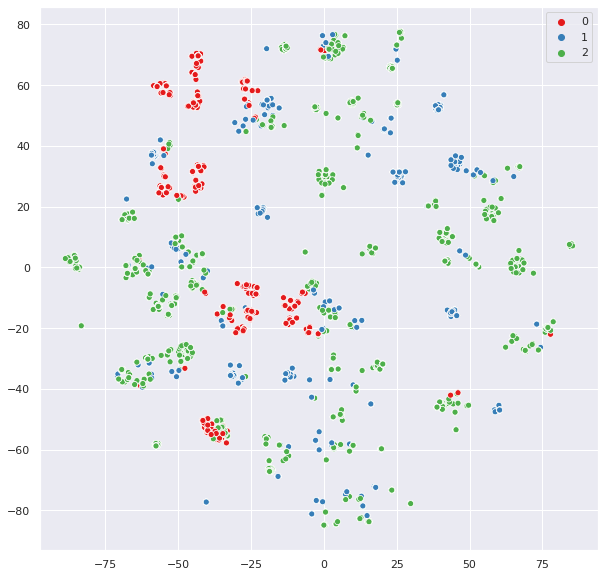

In [12]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (10,10)})

sns.scatterplot(x = visualization[:, 0],
                y = visualization[:, 1], 
                hue = model.labels_,
                palette = sns.color_palette('Set1', 3))

## 4th Class
> Date: April 24 (2020)

### Grouping in 20 groups
- **Problem:** The last class, we used our classifier using 3 clusters (or 3 groups). Now, we want test what happens if we try to use the classifier with a greater number of clusters. This is a good idea? 

In [13]:
model = KMeans(n_clusters = 20)
model.fit(scaled_genres)
groups = pd.DataFrame(data = model.cluster_centers_, columns = genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f013c1132d0>,
      dtype=object)

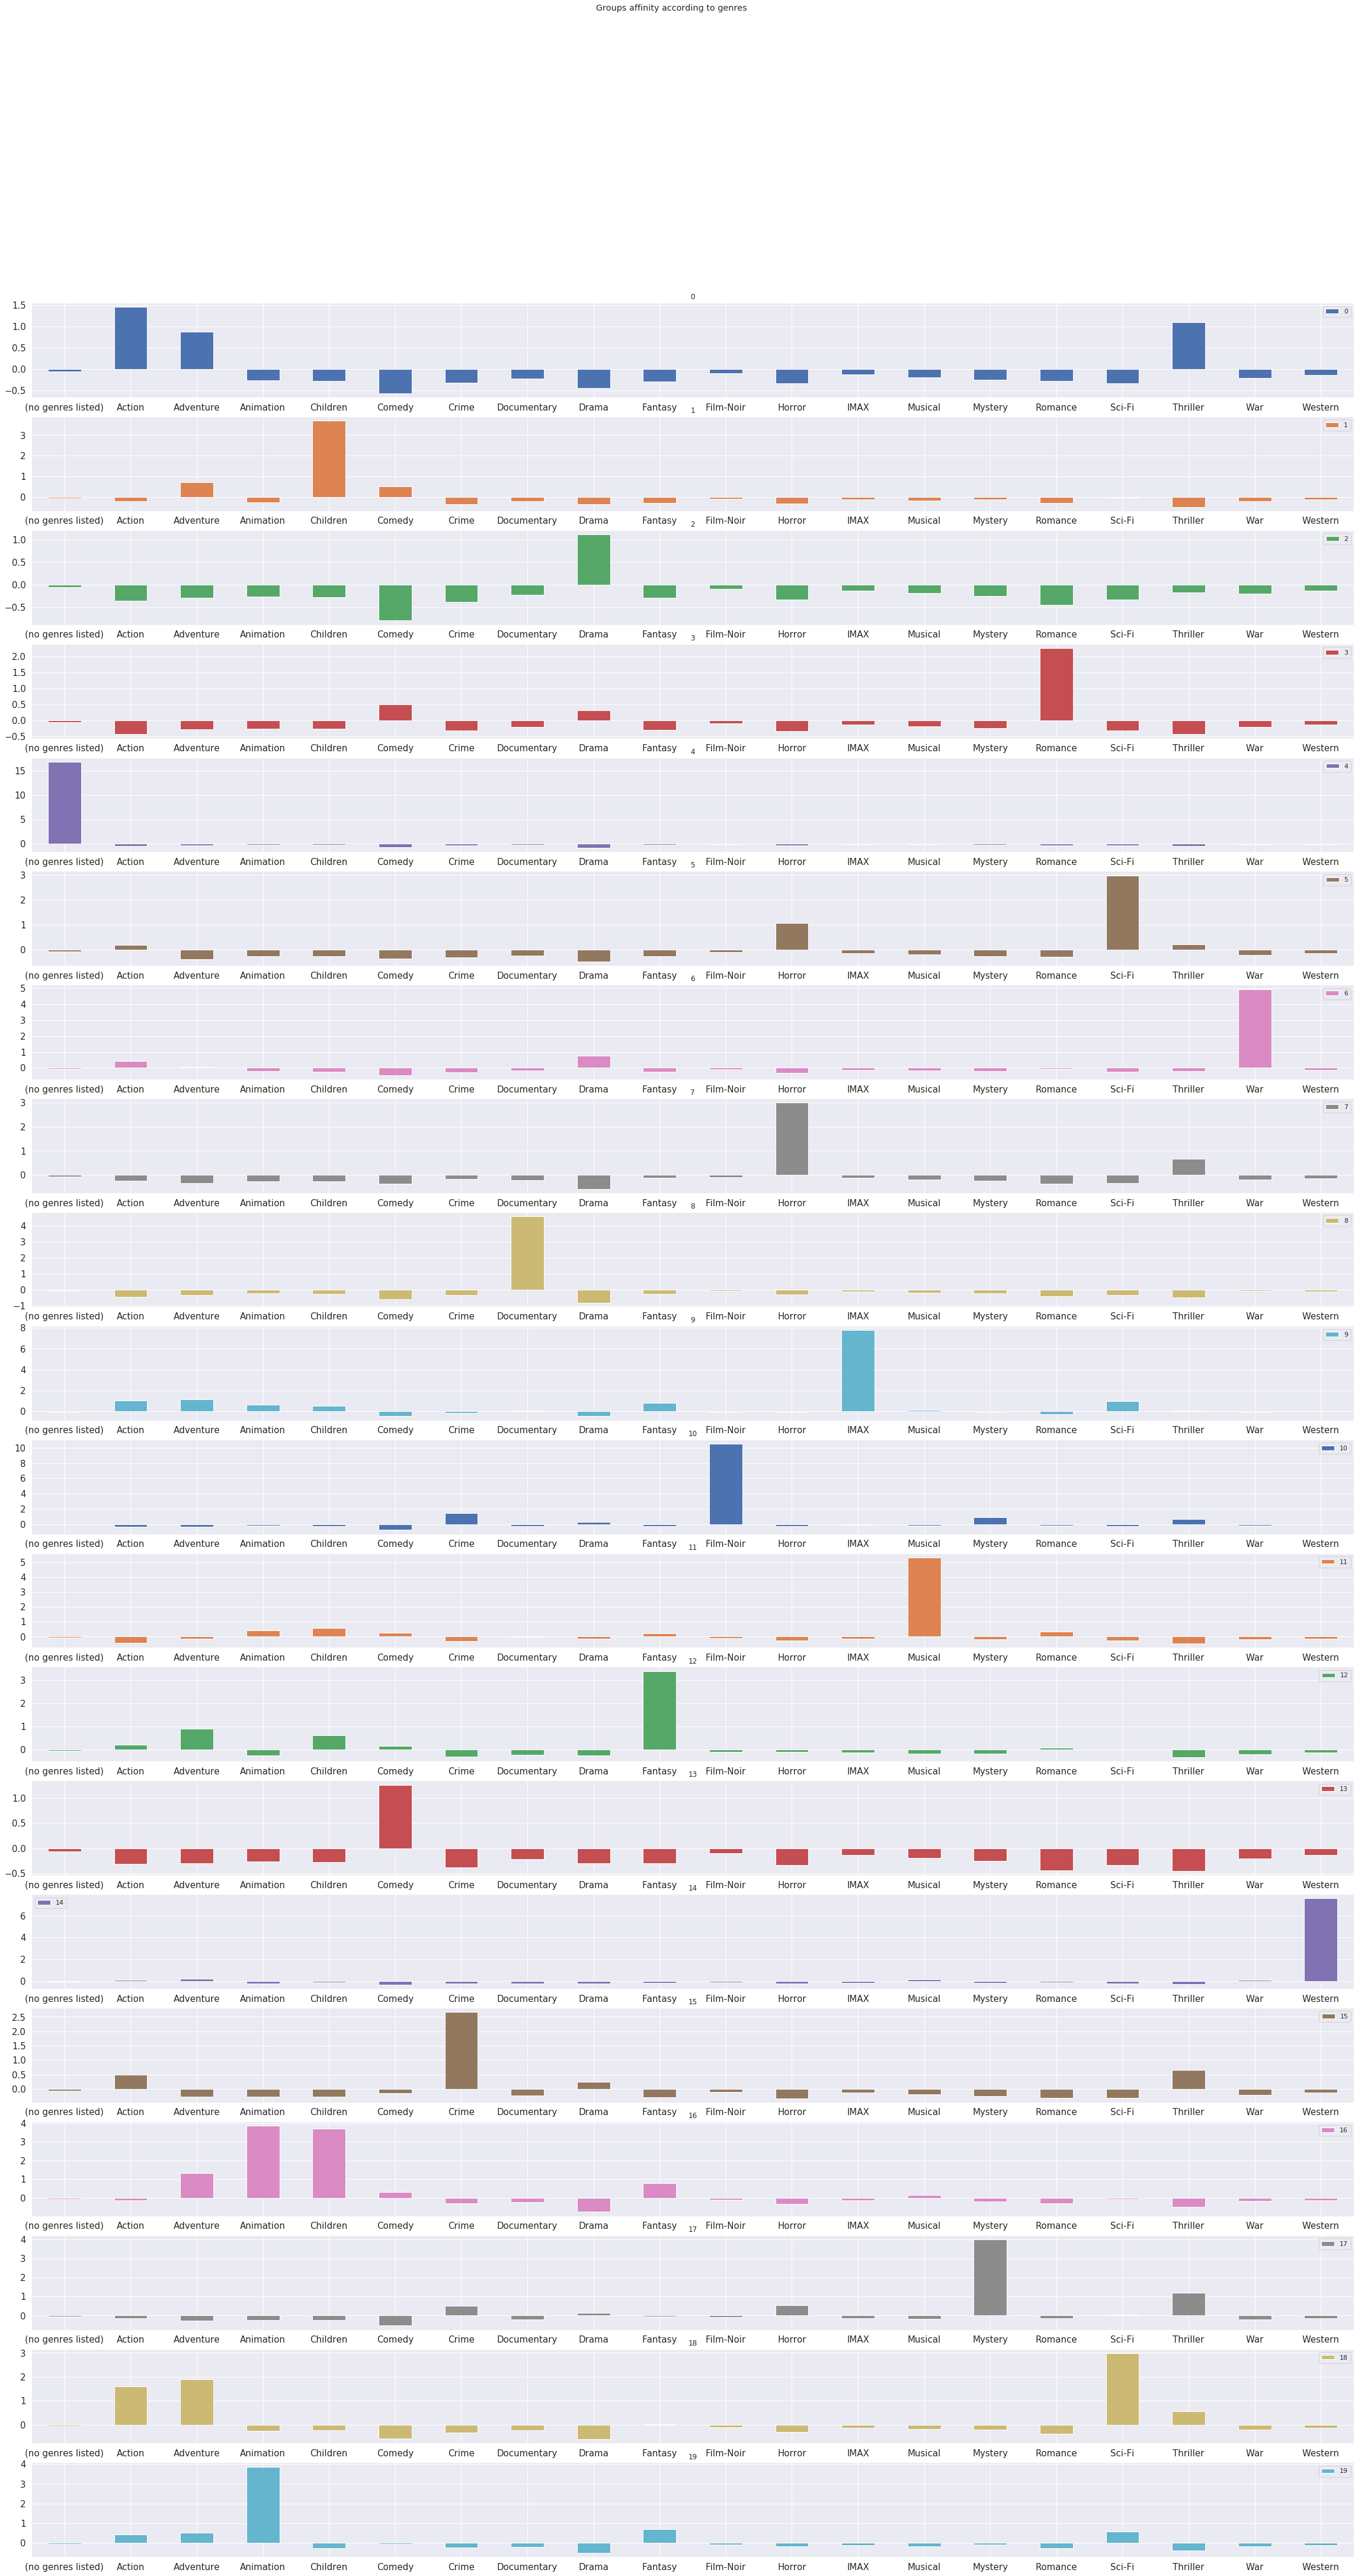

In [14]:
groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            rot      = 0,
                            figsize  = (40,70), 
                            title    = 'Groups affinity according to genres',
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

In [15]:
group = 7
data_filter = model.labels_ == group 
movies[data_filter].sample(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5341,8906,Cannibal Holocaust (1980),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5315,8815,Exorcist: The Beginning (2004),Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4942,7449,Godsend (2004),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8069,99191,Campfire Tales (1997),Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6858,62299,Alone in the Dark II (2008),Action|Horror,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4984,7650,"Witchfinder General (Conquerer Worm, The) (1968)",Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2091,2784,"Masque of the Red Death, The (1964)",Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7160,71732,I Sell the Dead (2008),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6387,50445,"Hitcher, The (2007)",Action|Horror|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1479,2004,Gremlins 2: The New Batch (1990),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
def films_classifier_error(n_clusters, genres):
    model = KMeans(n_clusters = n_clusters)
    model.fit(genres)
    inertia = model.inertia_
    return [n_clusters, inertia] # Mean squared error (MSE)
        

In [17]:
films_classifier_error(20, scaled_genres)

[20, 55050.92284946339]

In [18]:
result = [films_classifier_error(n_clusters, scaled_genres) for n_clusters in range(1, 41)]
result

[[1, 194840.0],
 [2, 179510.40662145478],
 [3, 166613.6807883647],
 [4, 157411.26902999647],
 [5, 147075.22639435588],
 [6, 137266.07686602976],
 [7, 128906.87944154516],
 [8, 119236.38535266025],
 [9, 111754.72295595214],
 [10, 103107.27532741766],
 [11, 94230.35180634876],
 [12, 87889.26247679588],
 [13, 81088.87213332088],
 [14, 74687.00191345387],
 [15, 68182.77438243259],
 [16, 63189.11905827868],
 [17, 61428.46185632143],
 [18, 58895.066084700215],
 [19, 57082.01317436515],
 [20, 55412.87175640751],
 [21, 53513.00827502094],
 [22, 52165.49550866975],
 [23, 50093.174639025674],
 [24, 48795.21728842223],
 [25, 48319.04499535586],
 [26, 47015.55461994871],
 [27, 45581.06435494337],
 [28, 45199.76411936832],
 [29, 43521.56213116952],
 [30, 42228.94837056846],
 [31, 41881.44458515416],
 [32, 41383.83011699011],
 [33, 39852.99883294997],
 [34, 39465.81319791655],
 [35, 38612.87565039563],
 [36, 38193.44325322966],
 [37, 36666.90829742235],
 [38, 36755.46199189905],
 [39, 36127.04020813

In [19]:
result = pd.DataFrame(result, 
                      columns = ['n_clusters', 'inertia'])
result

,n_clusters,inertia
0,1,194840.000000
1,2,179510.406621
2,3,166613.680788
3,4,157411.269030
4,5,147075.226394
5,6,137266.076866
6,7,128906.879442
7,8,119236.385353
8,9,111754.722956
9,10,103107.275327


Text(0, 0.5, 'Mean Squared Error')

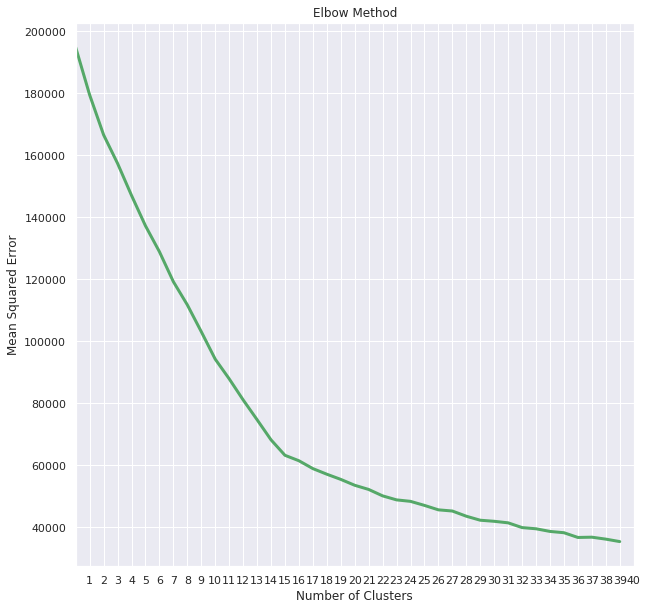

In [20]:
plot_res = result.inertia.plot(xticks = result.n_clusters,
                    title  = 'Elbow Method',
                    lw     = 3,
                    color  = "g"
                      )
plot_res.set_xlabel('Number of Clusters')
plot_res.set_ylabel('Mean Squared Error')

> Based on the Elbow method, the best point to use is the point where the graph begin to reduce the inclination. Seeing it and analysing our graph, we can try to use 17 as the number of clusters.

![Elbow Method](https://i.stack.imgur.com/t7v7J.png)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f012b85dd50>,
      dtype=object)

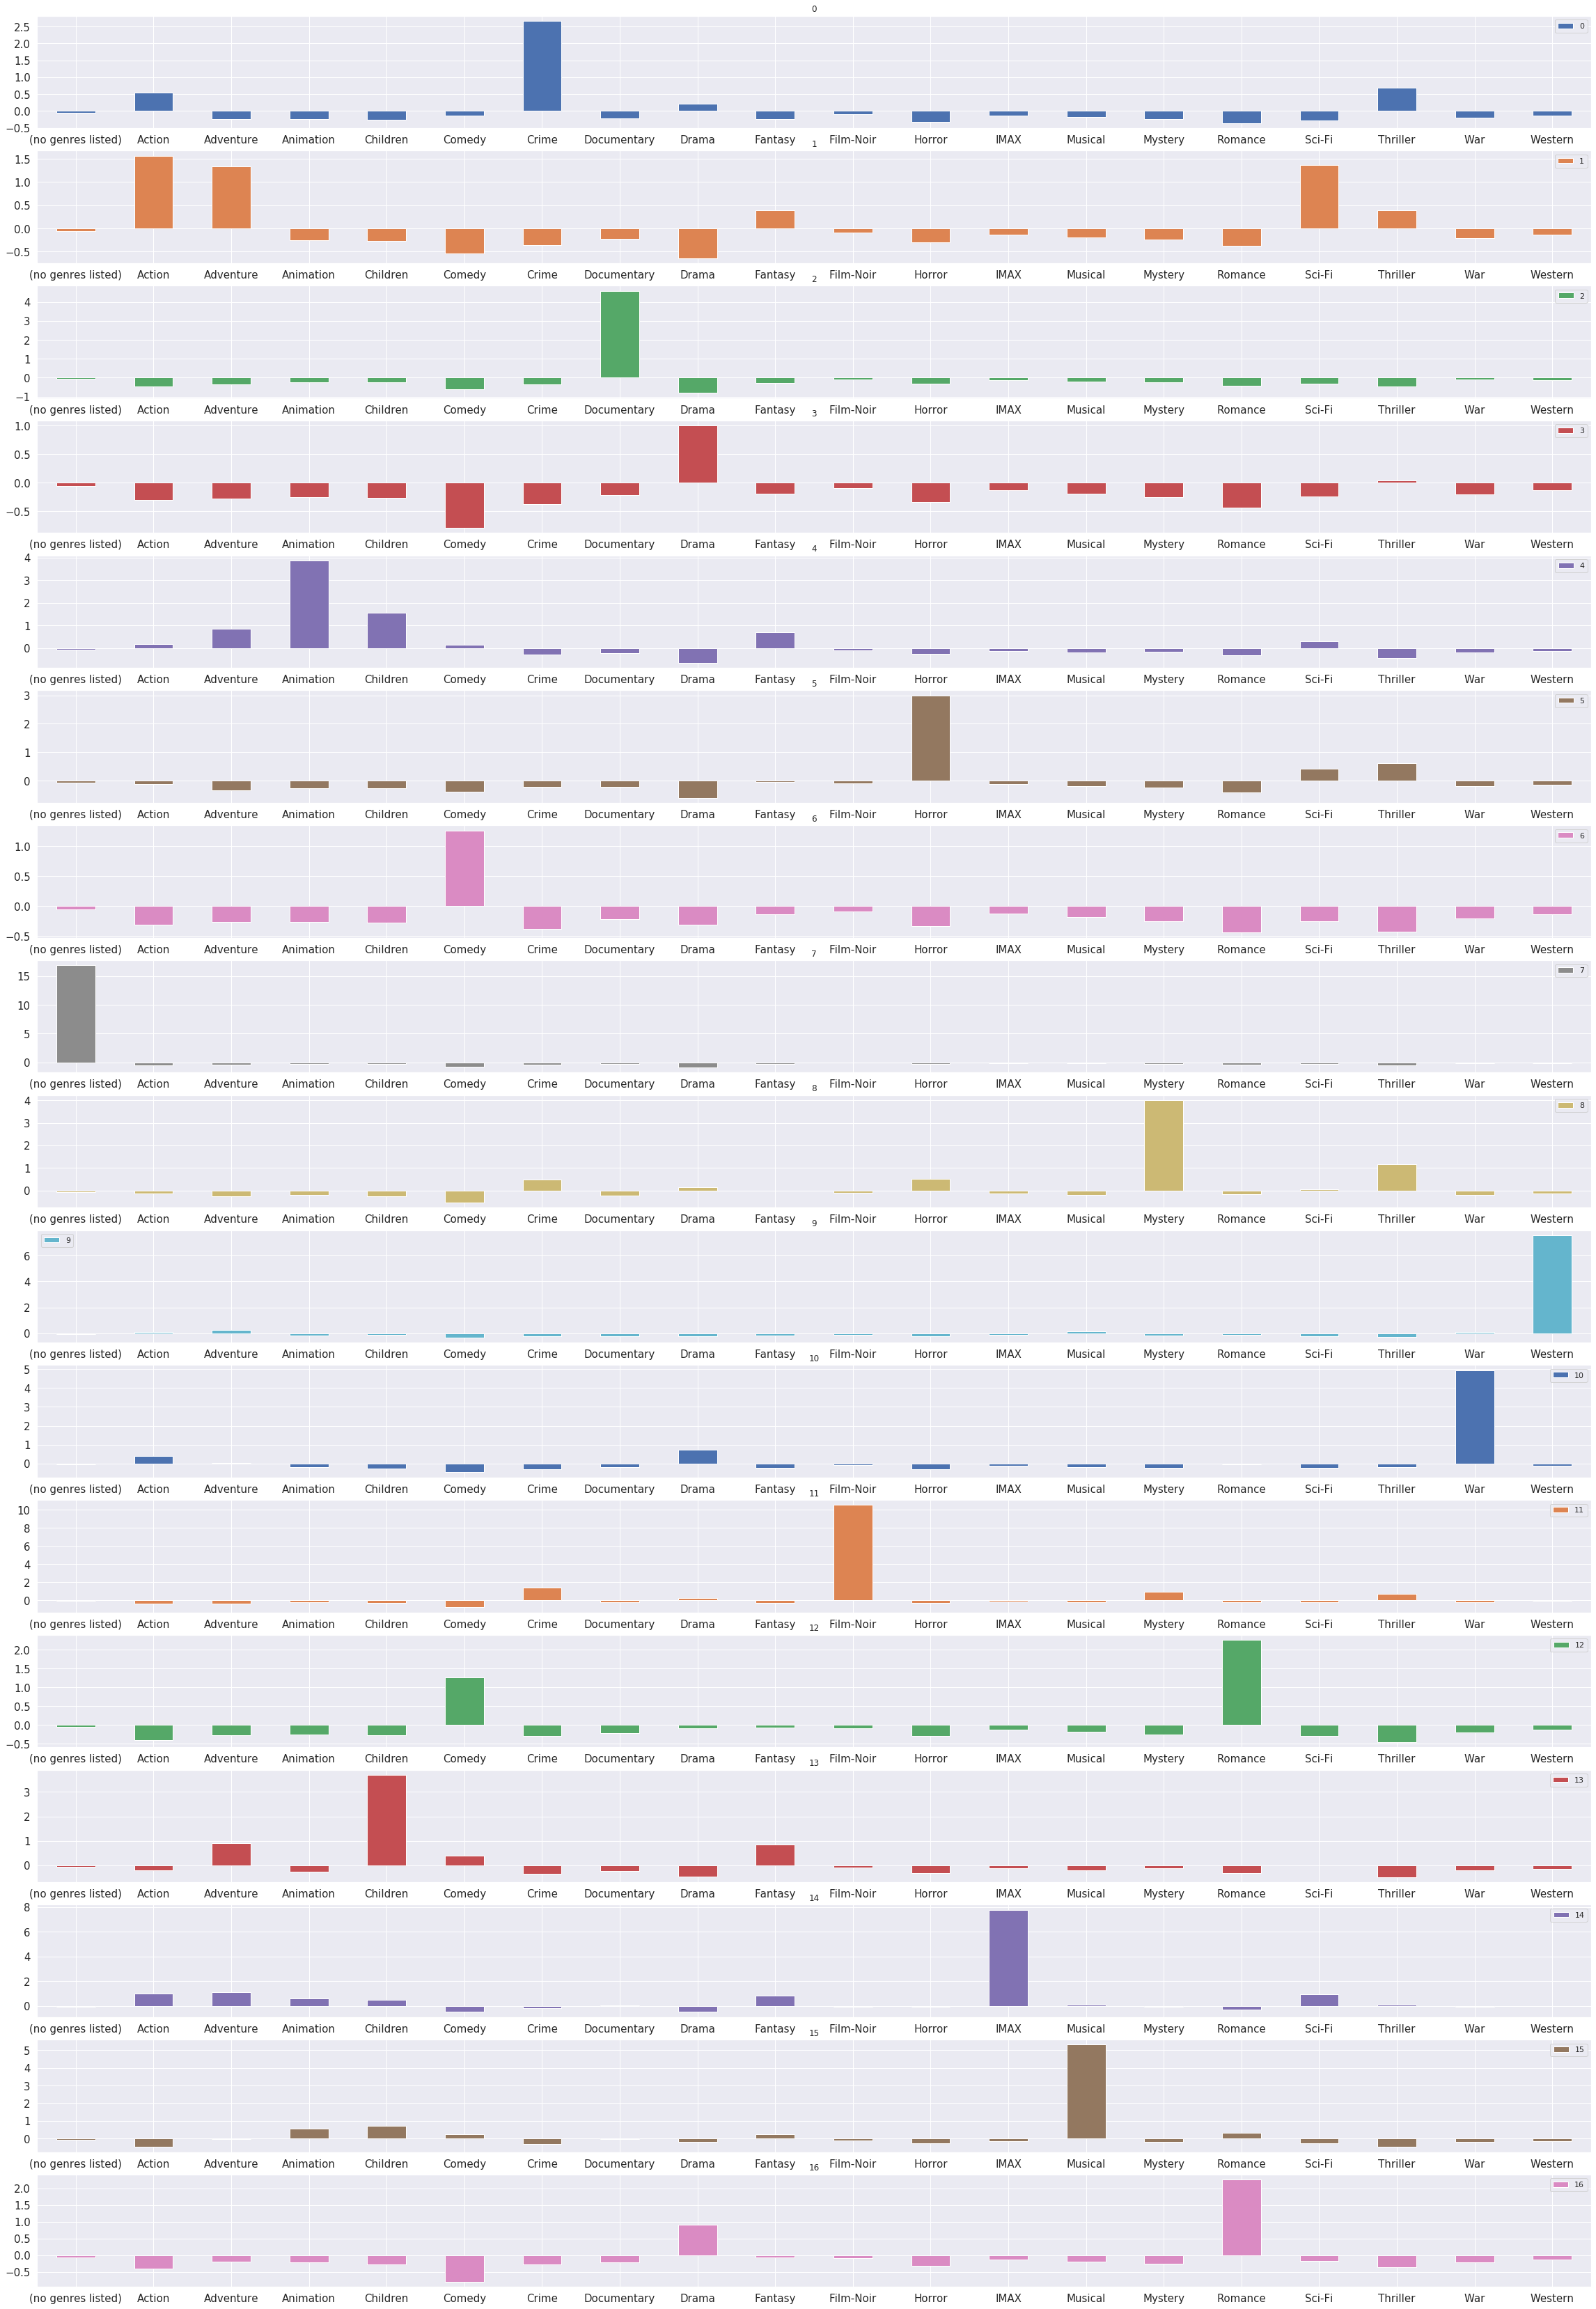

In [21]:
# Remaking the process of training
n_clusters = 17
model = KMeans(n_clusters = n_clusters)
model.fit(scaled_genres)
groups = pd.DataFrame(data = model.cluster_centers_,
                      columns = genres.columns)

groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            rot      = 0,
                            figsize  = (40,60), 
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

In [22]:
group = 9 # Western films
data_filter =  model.labels_ == group
movies[data_filter].sample(15)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1903,2527,Westworld (1973),Action|Sci-Fi|Thriller|Western,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
5595,26901,Last of the Dogmen (1995),Adventure|Western,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7353,78467,Jonah Hex (2010),Action|Drama|Thriller|Western,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3830,5375,"Harvey Girls, The (1946)",Comedy|Musical|Western,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3944,5550,Love Me Tender (1956),Musical|Western,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8766,128695,The Dark Valley (2014),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4479,6617,Open Range (2003),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,6691,Dust (2001),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6596,55363,Assassination of Jesse James by the Coward Rob...,Crime|Drama|Western,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1535,2070,Tender Mercies (1983),Drama|Romance|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters = 17)
groups = model.fit_predict(scaled_genres)

# dir(tsne)
visualization = tsne.fit_transform(scaled_genres)

In [30]:
visualization.shape

(9742, 2)

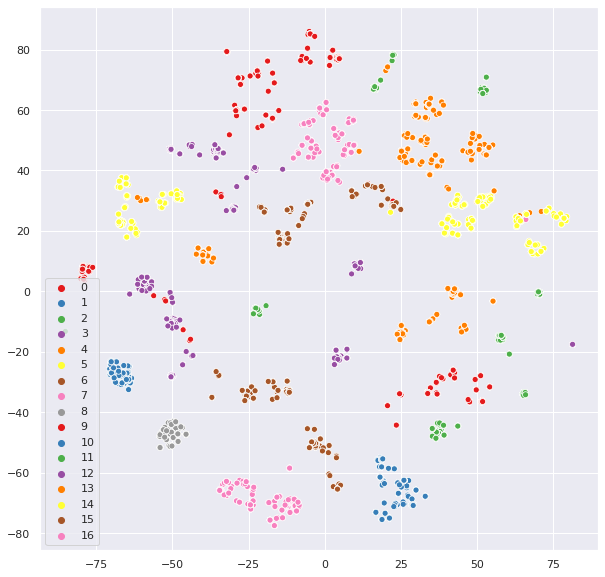

In [24]:
sns.scatterplot(x       = visualization[:, 0],
                y       = visualization[:, 1], 
                hue     = groups,
                palette = sns.color_palette('Set1', n_clusters))                # sns - Seaborn

## 5th Class
> Date: April 24 (2020)

### Hierarchical clustering
- **Problem:** In the last classes, we used KMeans to separate the groups using the called **centroids**, as we've studied. Now, we'll know a new form to cluster the data, named  **hierarchical clustering**. Using this method, it is possible to find a relation between the groups, what help us to make a better classifier. 

### Dendogram

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

n_clusters = 17
model = KMeans(n_clusters = n_clusters)
model.fit(scaled_genres)
groups = pd.DataFrame(data = model.cluster_centers_,
                      columns = genres.columns)

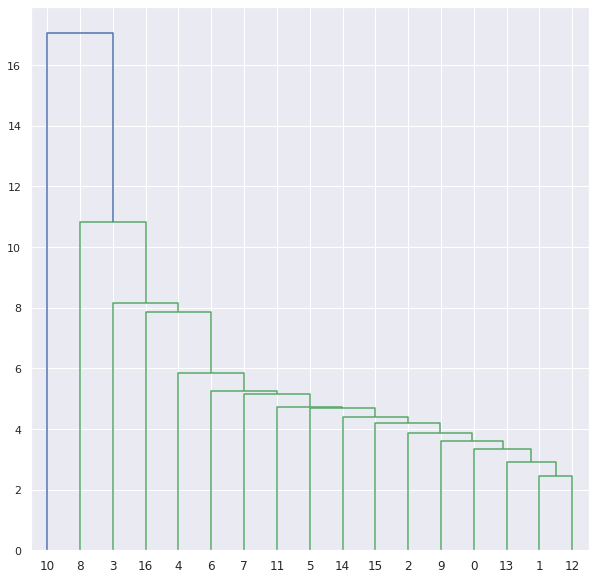

In [26]:
distance_matrix = linkage(groups)
dendrogram = dendrogram(distance_matrix)

## DBSCAN

> Using this method, we don't need to define a number of clusters. The algorithm will try to choose the best number by the analysis of the samples density.

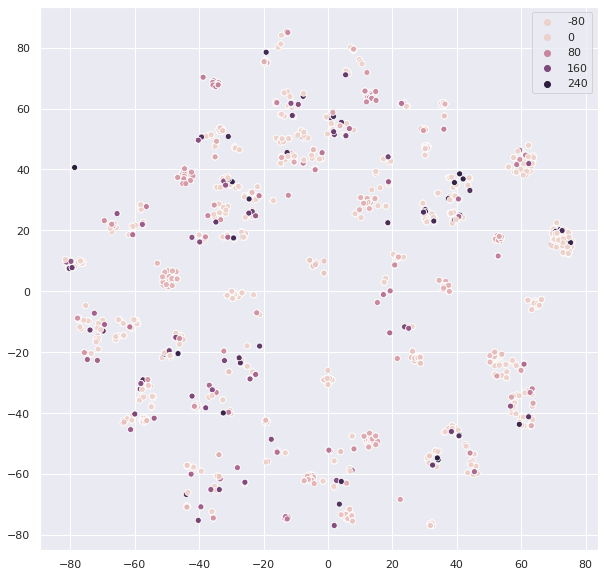

In [27]:
###########  IMCOMPLETED ALGORITHM  ###########
# Need some revisions and complementations

from sklearn.cluster import DBSCAN

model = DBSCAN()
groups = model.fit_predict(scaled_genres)

tsne = TSNE()
visualization = tsne.fit_transform(scaled_genres)

sns.set(rc = {'figure.figsize' : (10,10)})
sns.scatterplot(x = visualization[:, 0],
                y = visualization[:, 1], 
                hue = model.labels_)